# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing dataframe
path = r"C:\Users\User\Downloads\df_cleaned.csv"

In [4]:
# Load the data into a DataFrame
df_cleaned = pd.read_csv(path)

# Data prep

In [19]:
df_cleaned.head()

,incident_id,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,n_victims,n_suspects
0,461105,2013-01-01,Pennsylvania,0,4,Unknown,Unknown,0.0,4,1
1,460726,2013-01-01,California,1,3,Unknown,Unknown,0.0,4,1
2,478855,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,3,2
3,478925,2013-01-05,Colorado,4,0,Unknown,Unknown,0.0,3,1
4,478959,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,3,1


In [20]:
# Display information about the dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   incident_id      239677 non-null  int64  
 1   date             239677 non-null  object 
 2   state            239677 non-null  object 
 3   n_killed         239677 non-null  int64  
 4   n_injured        239677 non-null  int64  
 5   gun_stolen       239677 non-null  object 
 6   gun_type         239677 non-null  object 
 7   n_guns_involved  239677 non-null  float64
 8   n_victims        239677 non-null  int64  
 9   n_suspects       239677 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 18.3+ MB


In [22]:
df_cleaned.shape

(239677, 10)

In [23]:
# Drop categorical columns (keeping only numerical ones)
numerical_data = df_cleaned.select_dtypes(include=['float64', 'int64'])   # Select columns with numeric data types

In [24]:
# Handle missing values: Drop rows or fill missing values as needed
cleaned_data = numerical_data.dropna()    # Here, we'll drop rows with missing values

In [25]:
# Display the cleaned data
cleaned_data.head()

,incident_id,n_killed,n_injured,n_guns_involved,n_victims,n_suspects
0,461105,0,4,0.0,4,1
1,460726,1,3,0.0,4,1
2,478855,1,3,2.0,3,2
3,478925,4,0,0.0,3,1
4,478959,2,2,2.0,3,1


# The elbow technique

In [26]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)  # Defines the range of clusters from 1 to 9

In [27]:
# Initialize K-Means models for each cluster range
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]

In [28]:
# Fit the models and compute the inertia (within-cluster sum of squares)
score = [-model.fit(cleaned_data).score(cleaned_data) for model in kmeans]  # Use negative inertia for plotting

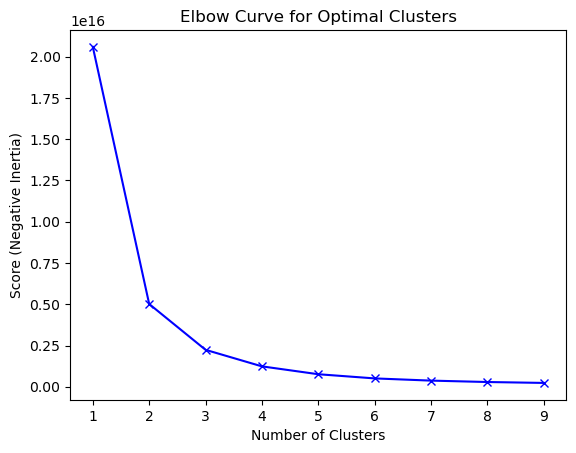

In [29]:
# Plot the elbow curve
pl.plot(num_cl, score, 'bx-')
pl.xlabel('Number of Clusters')
pl.ylabel('Score (Negative Inertia)')
pl.title('Elbow Curve for Optimal Clusters')
pl.show()

The curve begins to flatten out around 3 clusters. After 3, the reduction in score becomes less significant indicating that more clusters would greatly improve the model's fit. The ideal number of clusters for this dataset is 3. 

### 3. K-means clustering

In [30]:
# Create the K-Means object with 3 clusters
kmeans = KMeans(n_clusters=3)

In [31]:
# Fit the K-Means algorithm to the data
kmeans.fit(cleaned_data)

KMeans(n_clusters=3)

In [32]:
# Add cluster labels to the dataset
cleaned_data['clusters'] = kmeans.predict(cleaned_data)

In [33]:
# Check the number of samples in each cluster
print("Cluster counts:")
print(cleaned_data['clusters'].value_counts())

Cluster counts:
clusters
0    82662
2    78663
1    78352
Name: count, dtype: int64


In [34]:
cleaned_data.head()

,incident_id,n_killed,n_injured,n_guns_involved,n_victims,n_suspects,clusters
0,461105,0,4,0.0,4,1,2
1,460726,1,3,0.0,4,1,2
2,478855,1,3,2.0,3,2,2
3,478925,4,0,0.0,3,1,2
4,478959,2,2,2.0,3,1,2


In [35]:
# Plot the clusters for two selected variables (replace with relevant variables from your data)
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=cleaned_data['n_injured'],  # Replace with the x-variable of your choice
    y=cleaned_data['n_killed'],  # Replace with the y-variable of your choice
    hue=cleaned_data['clusters'],  # Cluster labels
    palette='viridis',
    s=100
)

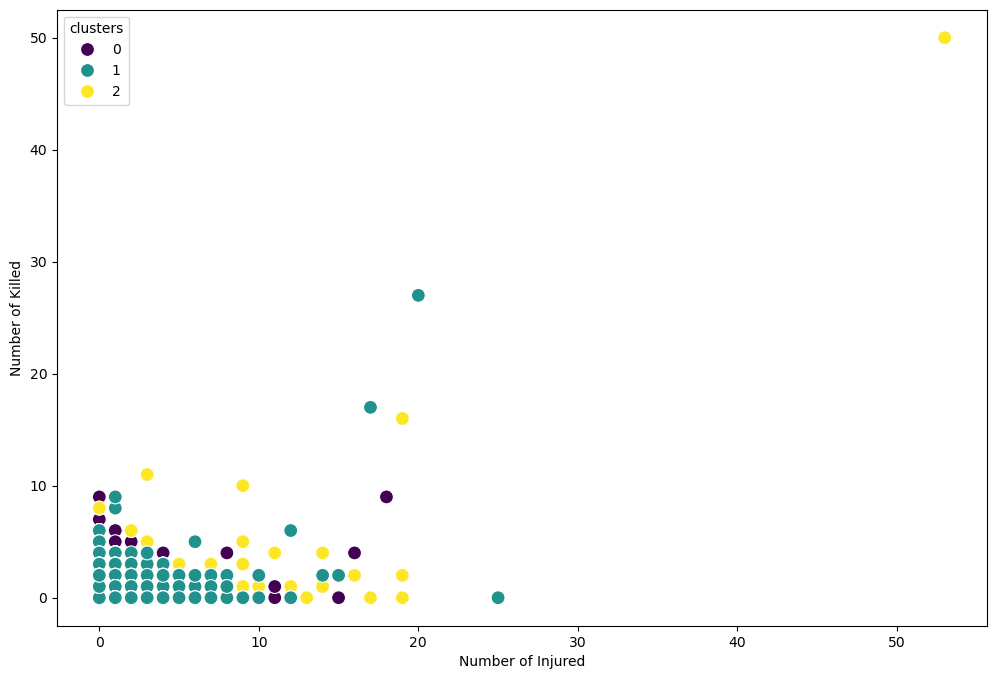

In [38]:
# Customize plot appearance
ax.grid(False)  # Remove background grid
plt.xlabel('Number of Injured')  # Label x-axis
plt.ylabel('Number of Killed')  # Label y-axis
plt.show()

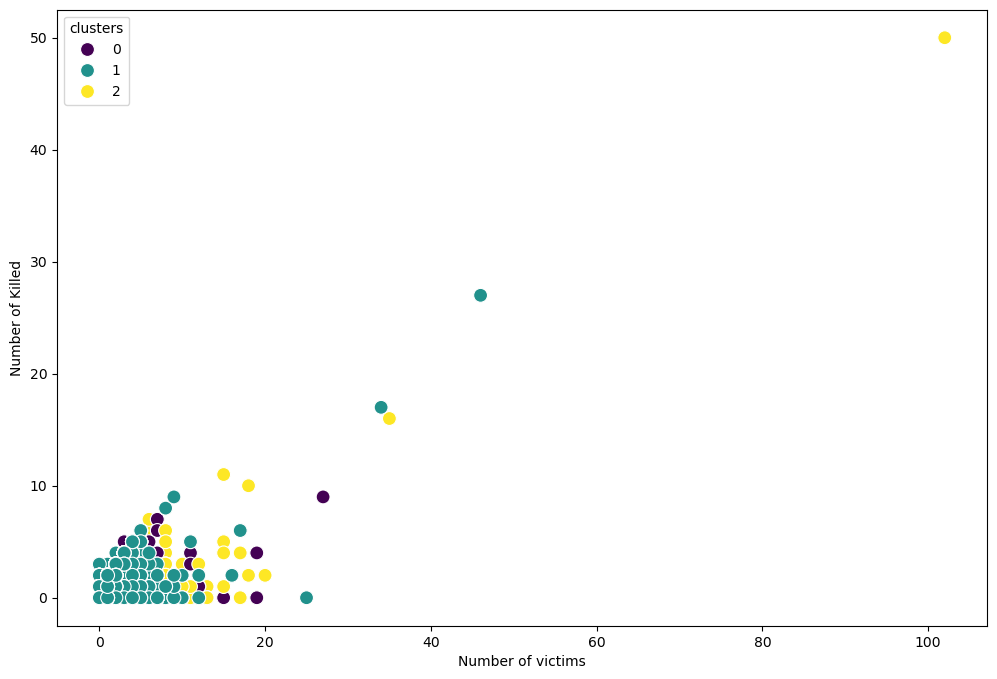

In [39]:
# Plot the clusters for two selected variables (replace with relevant variables from your data)
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=cleaned_data['n_victims'],  
    y=cleaned_data['n_killed'],  
    hue=cleaned_data['clusters'],  
    palette='viridis',
    s=100
)
ax.grid(False)  
plt.xlabel('Number of victims')  
plt.ylabel('Number of Killed')  
plt.show()

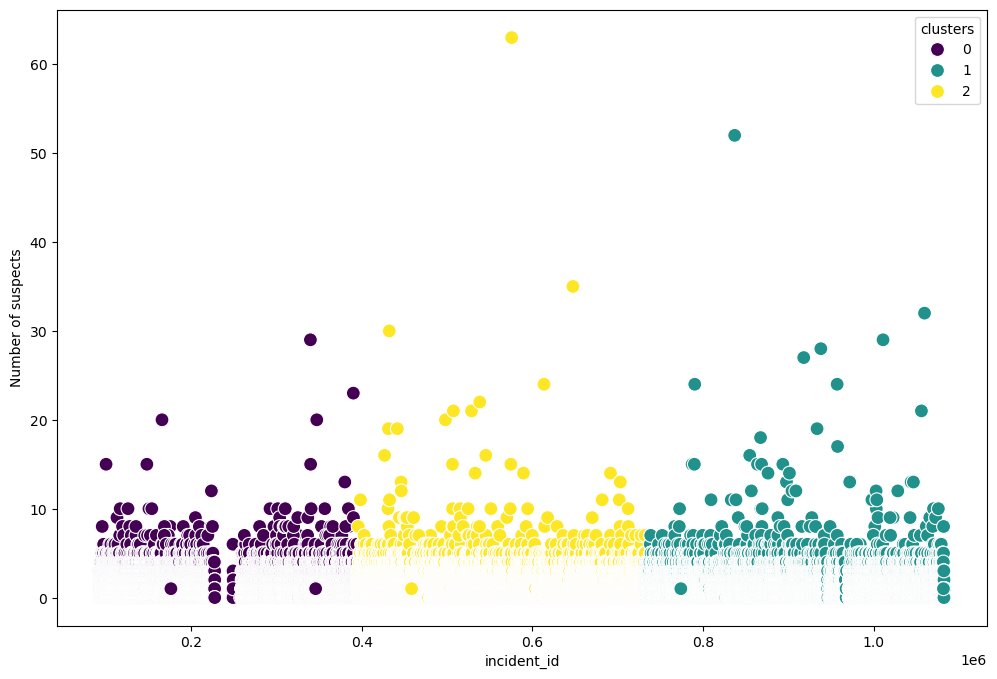

In [40]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=cleaned_data['incident_id'],  
    y=cleaned_data['n_suspects'],  
    hue=cleaned_data['clusters'],  
    palette='viridis',
    s=100
)
ax.grid(False)  
plt.xlabel('incident_id')  
plt.ylabel('Number of suspects')  
plt.show()

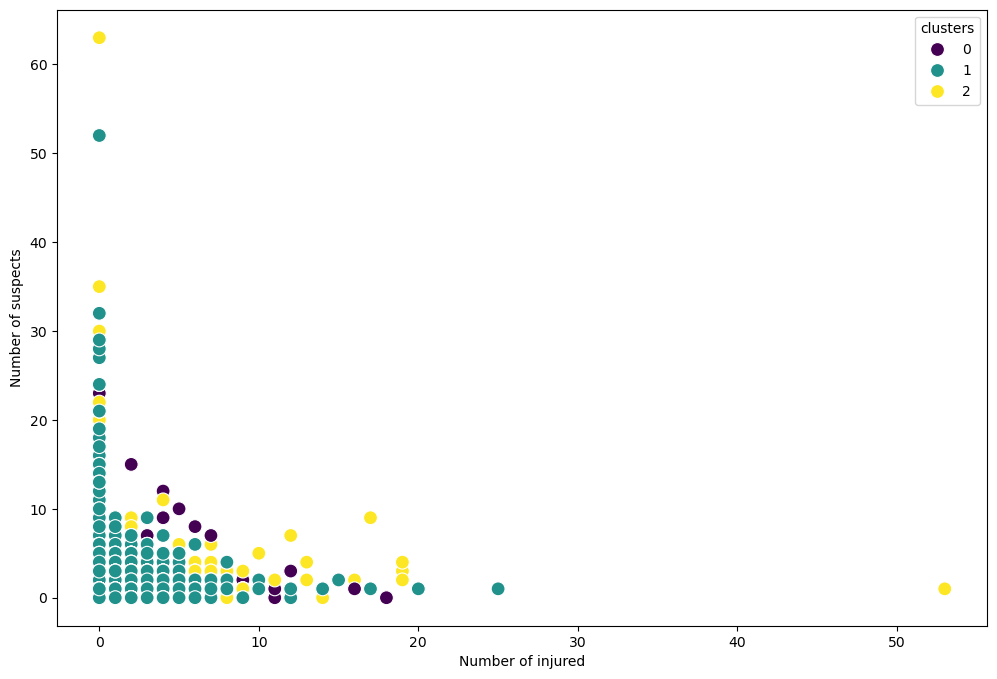

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=cleaned_data['n_injured'],  
    y=cleaned_data['n_suspects'],  
    hue=cleaned_data['clusters'],  
    palette='viridis',
    s=100
)
ax.grid(False)  
plt.xlabel('Number of injured')  
plt.ylabel('Number of suspects')  
plt.show()

The scatter plot visualization shows three clusters, likely representing different severity levels of incidents based on the number of injured and victims. The clustering makes sense in that most data points are concentrated at lower values, with some extreme cases forming distinct groups. However, the overlap between clusters suggests that the separation might not be entirely clear, potentially requiring further exploration. If the goal was to classify incidents by severity, the clustering could be refined by adjusting parameters, incorporating additional features, or using a different clustering method. Further analysis of cluster centroids and feature relationships would help validate the effectiveness of the grouping.

# Descriptive statistics

In [47]:
# Assign readable cluster names (optional)
cleaned_data.loc[cleaned_data['clusters'] == 2, 'cluster'] = 'yellow'
cleaned_data.loc[cleaned_data['clusters'] == 1, 'cluster'] = 'blue'
cleaned_data.loc[cleaned_data['clusters'] == 0, 'cluster'] = 'dark purple'

In [48]:
# Calculate descriptive statistics (mean & median) for each cluster
cluster_stats = cleaned_data.groupby('cluster').agg({
    'incident_id': ['count'],  # Count of incidents per cluster
    'n_killed': ['mean', 'median'],  
    'n_injured': ['mean', 'median'],  
    'n_guns_involved': ['mean', 'median'],  
    'n_victims': ['mean', 'median'],  
    'n_suspects': ['mean', 'median']
})

In [49]:
print(cluster_stats)

            incident_id  n_killed        n_injured        n_guns_involved  \
                  count      mean median      mean median            mean   
cluster                                                                     
blue              78352  0.251787    0.0  0.483919    0.0        1.256611   
dark purple       82662  0.247260    0.0  0.473059    0.0        0.322288   
yellow            78663  0.258076    0.0  0.526067    0.0        0.856222   

                   n_victims        n_suspects         
            median      mean median       mean median  
cluster                                                
blue           1.0  0.699382    1.0   0.830815    1.0  
dark purple    0.0  0.902011    1.0   0.852254    1.0  
yellow         1.0  0.809784    1.0   0.810012    1.0  


### Severity of Incidents (n_killed & n_injured)
- All clusters have a median of 0 for both fatalities and injuries, meaning that in most incidents, no one was killed or injured. However, the mean    values suggest that some incidents did involve casualties.
- Yellow cluster has the highest average injuries (0.526) and fatalities (0.258), implying that incidents in this cluster tend to be slightly more severe.
- Dark purple cluster has the lowest average injuries (0.473) and fatalities (0.247), meaning it contains relatively less severe incidents than the other clusters.
### Guns Involved (n_guns_involved)
- The blue cluster has the highest average number of guns involved (1.256), suggesting that incidents in this group involve more firearms.
- Yellow cluster follows with 0.856 guns per incident, which is lower than blue but still significant.
- Dark purple cluster has the lowest number of guns involved (0.322), suggesting that incidents in this group might involve fewer or no firearms.
### Number of Victims (n_victims)
- Dark purple cluster has the highest average number of victims (0.902), meaning incidents in this group tend to affect more people on average.
- Yellow cluster follows with 0.809 victims per incident, which is still relatively high.
- Blue cluster has the lowest number of victims (0.699), suggesting that incidents in this cluster are slightly less impactful in terms of the number of people affected.
### Number of Suspects (n_suspects)
- All clusters have a median of 1 suspect per incident, suggesting that most cases involve a single suspect.
- The dark purple cluster has the highest average number of suspects (0.852), which could indicate that this group includes more incidents involving multiple suspects.
- Blue and yellow clusters have similar suspect averages (~0.81), implying that incidents in these clusters also involve more than one suspect at times but slightly less frequently than the dark purple cluster.
### Overall Interpretation
- Blue Cluster: Contains more firearm-related incidents but with relatively lower fatalities and victims per incident.
- Dark Purple Cluster: Has the highest number of victims per incident but the fewest guns involved, indicating it might include incidents like assaults or mass attacks without firearms.
- Yellow Cluster: Appears to be the most severe in terms of casualties (highest number of injuries and deaths), indicating it might represent more deadly incidents.

# Propose what these results could be useful for in future steps of an analytics pipeline

These results can be useful for identifying patterns in violent incidents, helping policymakers and law enforcement allocate resources more effectively. By understanding which clusters involve more fatalities, injuries, or firearms, analysts can develop targeted prevention strategies, such as stricter firearm regulations or increased policing in high-risk areas. Additionally, these insights can aid in predictive modeling, allowing authorities to anticipate and mitigate future incidents based on historical trends. Further steps in the analytics pipeline could include time-series forecasting, geospatial analysis, or sentiment analysis from reports to enhance incident response and policy-making.